<a href="https://colab.research.google.com/github/marcosalinas777/finalprojectMS/blob/main/MS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import pandas as pd
import numpy as np
import string
import nltk
import nltk.corpus
import sklearn
import csv
import re
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords,wordnet
from nltk import NaiveBayesClassifier
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split
from keras.models import load_model

# tokenize the dataset corpus, delete uncommon words such as names.
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import text, sequence
from IPython.display import display, HTML
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.metrics import precision_score, accuracy_score, f1_score,recall_score, roc_auc_score,precision_recall_curve, average_precision_score, auc, roc_curve
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from sklearn.metrics import classification_report

from keras.utils import plot_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pickle

sns.set()

In [ ]:
#these lines of code ensure that the necessary NLTK resources for stop words, tokenization, part-of-speech tagging, WordNet, and multilingual WordNet are downloaded and available for use in your natural language processing tasks.
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
data = pd.read_csv ('/content/drive/MyDrive/Predictive Analytics/developed in class/projects/Apple Sentiment-DFE.tsv', sep = '\t')

EDA


In [ ]:
data.head(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/2014 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL
5,623495518,True,golden,13,NaN,3,0.5975,Mon Dec 01 20:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,#AAPL:5 Rocket Stocks to Buy for December Gain...
6,623495519,True,golden,13,NaN,5,0.8468,Mon Dec 01 20:32:45 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,Top 3 all @Apple #tablets. Damn right! http://...
7,623495520,True,golden,9,NaN,5,0.6736,Mon Dec 01 20:34:31 +0000 2014,5.400000e+17,#AAPL OR @Apple,5\n3,CNBCTV: #Apple's margins better than expected?...
8,623495521,True,golden,15,NaN,3,0.7997,Mon Dec 01 20:36:47 +0000 2014,5.400000e+17,#AAPL OR @Apple,1,Apple Inc. Flash Crash: What You Need to Know ...
9,623495522,False,finalized,3,12/12/2014 0:52,3,0.6360,Mon Dec 01 20:45:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,#AAPL:This Presentation Shows What Makes The W...


In [ ]:
data.describe()

,_unit_id,_trusted_judgments,sentiment:confidence,id
count,3.886000e+03,3886.000000,3886.000000,3.886000e+03
mean,6.234975e+08,3.687082,0.829526,5.410039e+17
std,1.171906e+03,2.004595,0.175864,7.942752e+14
min,6.234955e+08,3.000000,0.332700,5.400000e+17
25%,6.234965e+08,3.000000,0.674475,5.400000e+17
50%,6.234975e+08,3.000000,0.811250,5.410000e+17
75%,6.234984e+08,3.000000,1.000000,5.420000e+17
max,6.235173e+08,27.000000,1.000000,5.420000e+17


In [ ]:
data['sentiment'].value_counts()

3               2162
1               1219
5                423
not_relevant      82
Name: sentiment, dtype: int64

In [ ]:
# How many reviews we have
print('There are', data.shape[0], 'reviews')

# check for duplicates
print("There are", len(data[data.duplicated()]), "duplicates")

# check if we have missing values
print("There are", data.isnull().sum().sum(), "missing values")

There are 3886 reviews
There are 0 duplicates
There are 3886 missing values


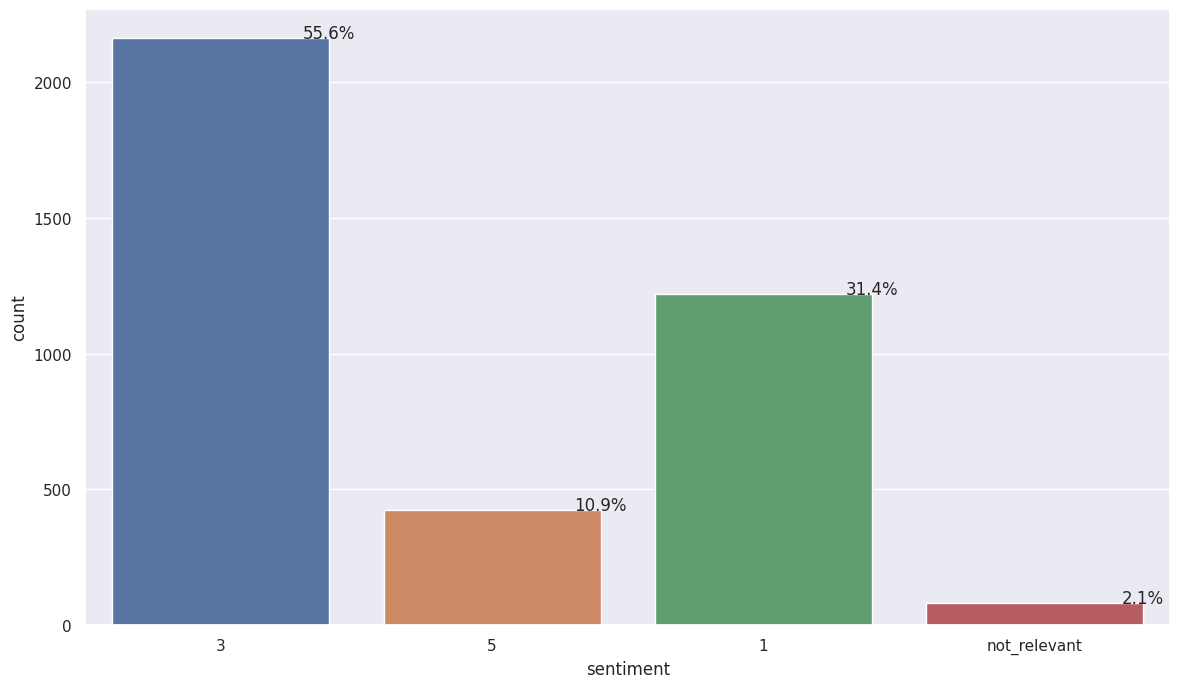

In [ ]:
# create a horizontal bar plot (count plot) that visualizes the distribution of sentiment labels in a dataset
plt.figure(figsize=(14,8))
total = float(len(data))
ax = sns.countplot(x="sentiment", data=data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/2014 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [ ]:
data['_unit_state'].value_counts()

finalized    3782
golden        104
Name: _unit_state, dtype: int64

In [ ]:
#  data's categories
# categories variable will contain a NumPy array where each element is 1 if the corresponding '_trusted_judgments' value in the original DataFrame is greater than 3, and 0 otherwise
categories = pd.DataFrame(data['_trusted_judgments'].apply(lambda x: 1 if (x > 3) else 0) ).to_numpy()
categories

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
# create new  column called sentiment and store the pos for rate over 3 and negaive for the rest
data['sentiment'] = data['_trusted_judgments'].apply(lambda x: "Positive" if (x > 3) else "Negative")
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,Positive,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,Positive,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,Positive,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,Positive,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/2014 12:14,Negative,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [ ]:
data.head(30)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,Positive,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,Positive,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,Positive,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,Positive,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/2014 12:14,Negative,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL
5,623495518,True,golden,13,NaN,Positive,0.5975,Mon Dec 01 20:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,#AAPL:5 Rocket Stocks to Buy for December Gain...
6,623495519,True,golden,13,NaN,Positive,0.8468,Mon Dec 01 20:32:45 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,Top 3 all @Apple #tablets. Damn right! http://...
7,623495520,True,golden,9,NaN,Positive,0.6736,Mon Dec 01 20:34:31 +0000 2014,5.400000e+17,#AAPL OR @Apple,5\n3,CNBCTV: #Apple's margins better than expected?...
8,623495521,True,golden,15,NaN,Positive,0.7997,Mon Dec 01 20:36:47 +0000 2014,5.400000e+17,#AAPL OR @Apple,1,Apple Inc. Flash Crash: What You Need to Know ...
9,623495522,False,finalized,3,12/12/2014 0:52,Negative,0.6360,Mon Dec 01 20:45:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,#AAPL:This Presentation Shows What Makes The W...


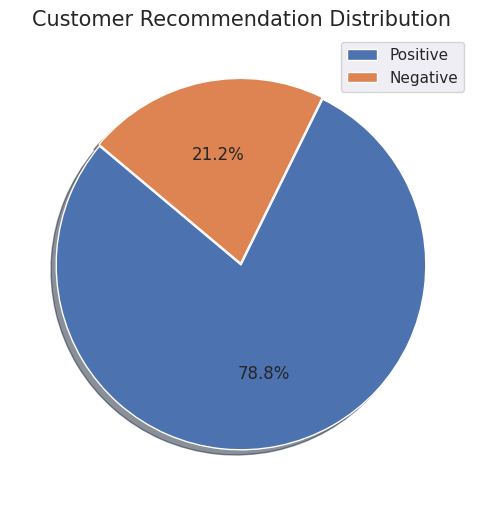

In [ ]:
#visualizing the distribution of sentiment labels in the 'sentiment' column, with positive and negative sentiments represented in the pie chart.
plt.figure(figsize=(6, 6))

explode = [0, 0.01]
plt.pie(data['sentiment'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['Positive', 'Negative'])
plt.title('Customer Recommendation Distribution', fontsize=15)
plt.axis('off');

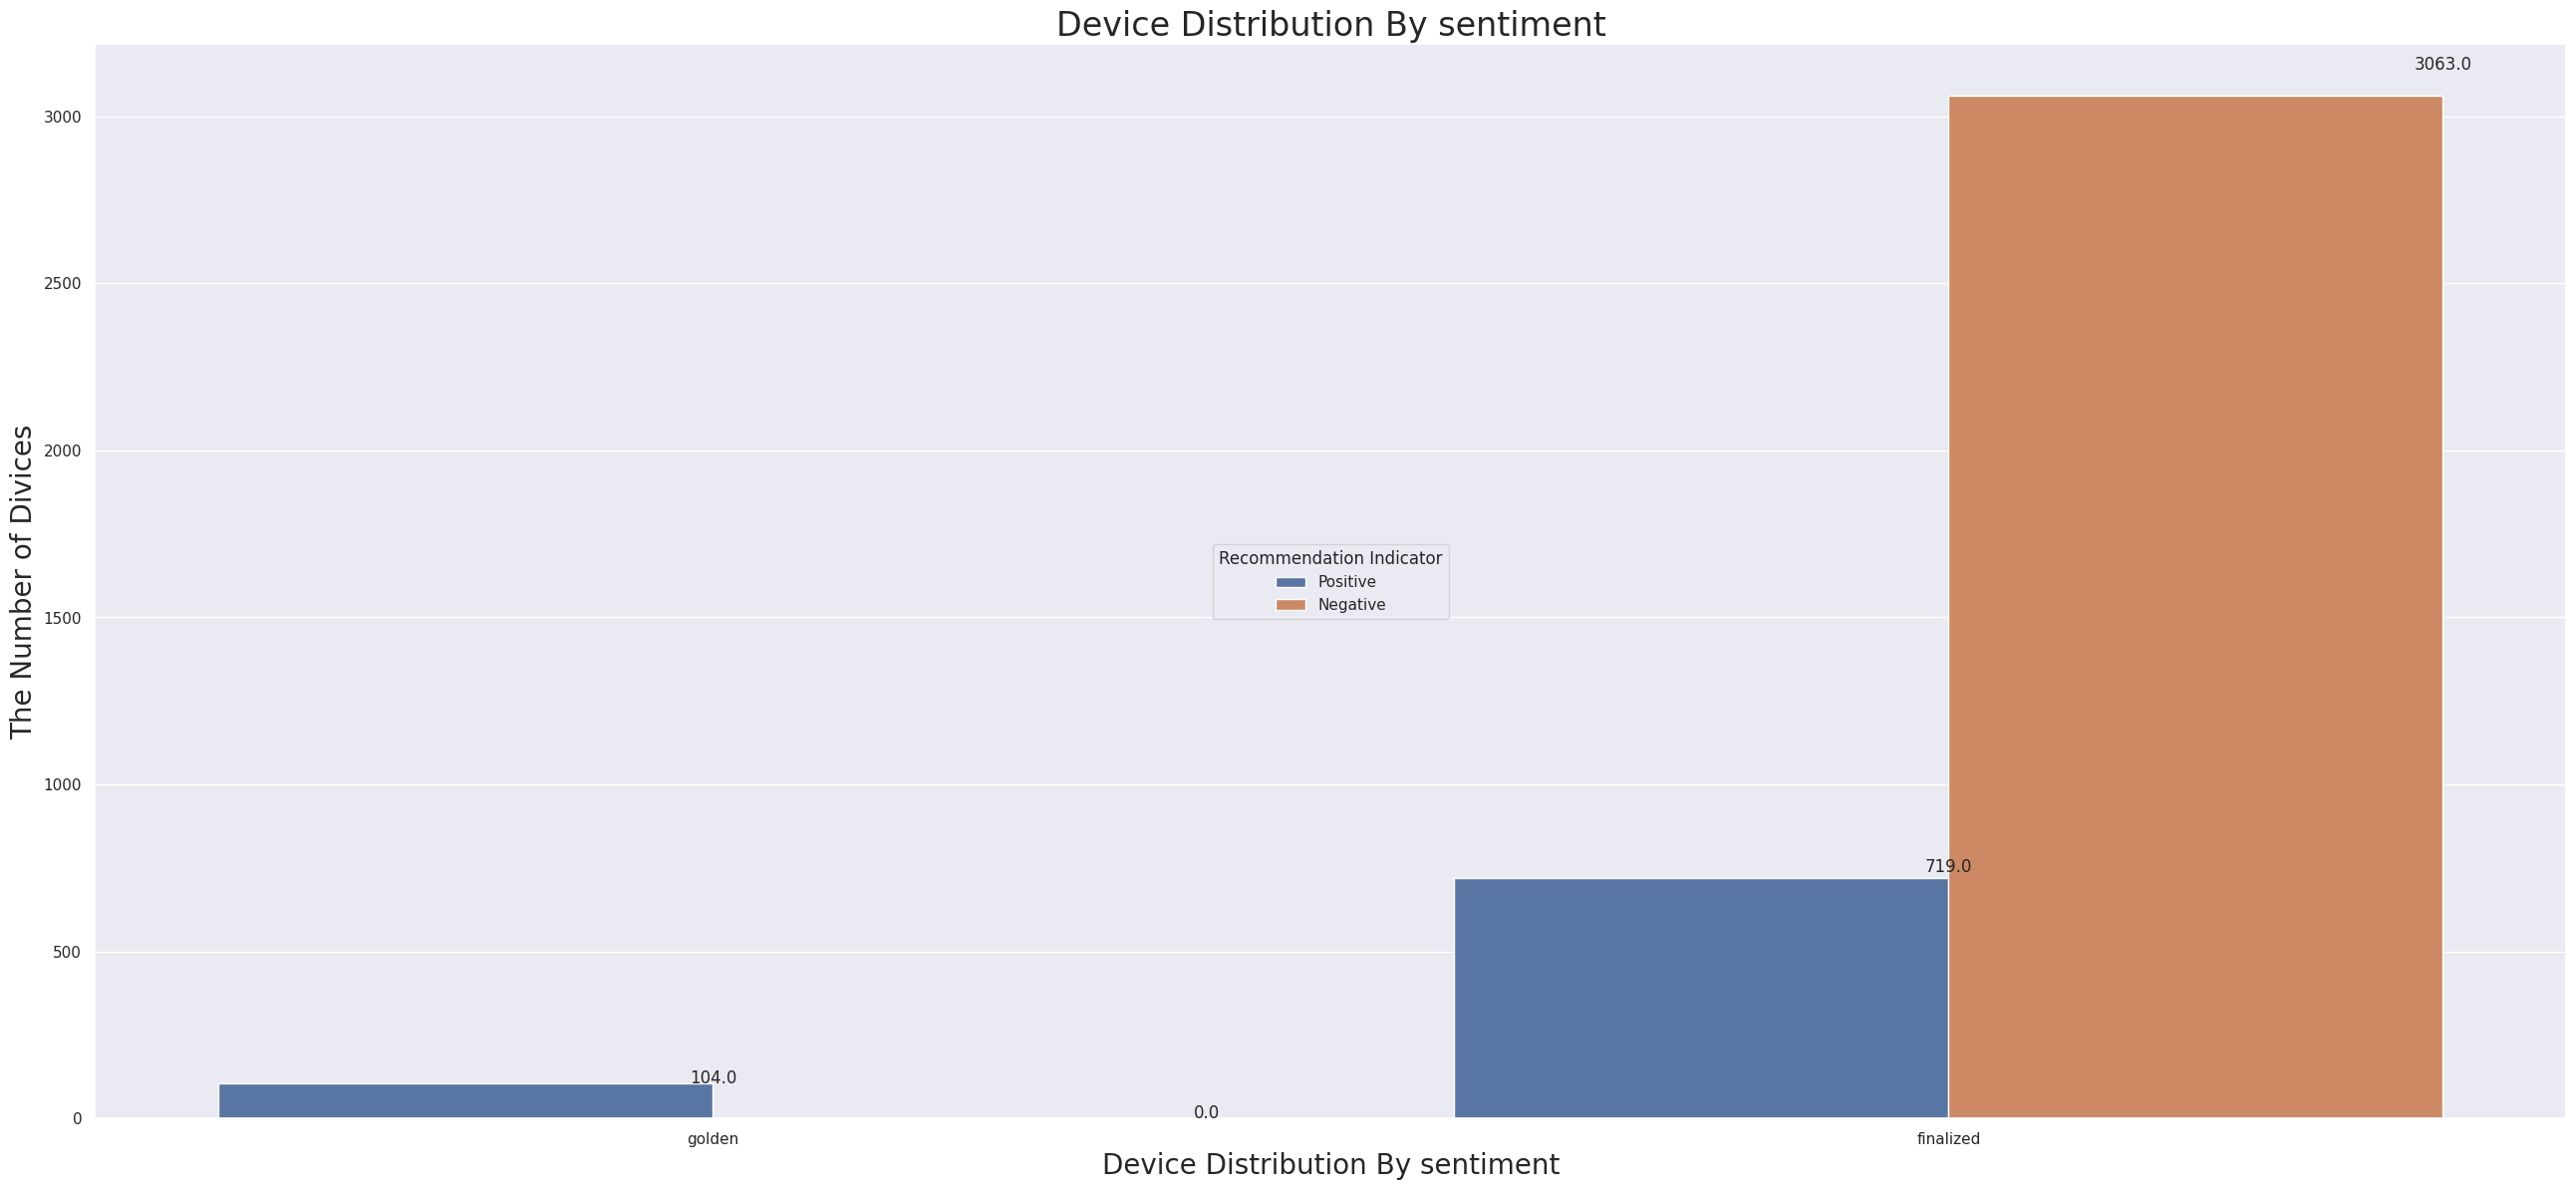

In [ ]:
# It seems that the majority of customers have given positive feedback about the device
#creates a grouped bar plot showing the distribution of sentiment labels for different states specified by the '_unit_state' column.

plt.figure(figsize=(32,14))
total = float(len(data))
ax = sns.countplot(x="_unit_state", hue = "sentiment", data=data)

plt.title('Device Distribution By sentiment', fontsize=24)
plt.xlabel("Device Distribution By sentiment", fontsize=20)
plt.ylabel("The Number of Divices", fontsize=20)
plt.legend(title='Recommendation Indicator', loc='center', labels=['Positive', 'Negative'])

for p in ax.patches:
   # percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()* 1.025
    ax.annotate(p.get_height(), (x, y),ha='center')

plt.show()

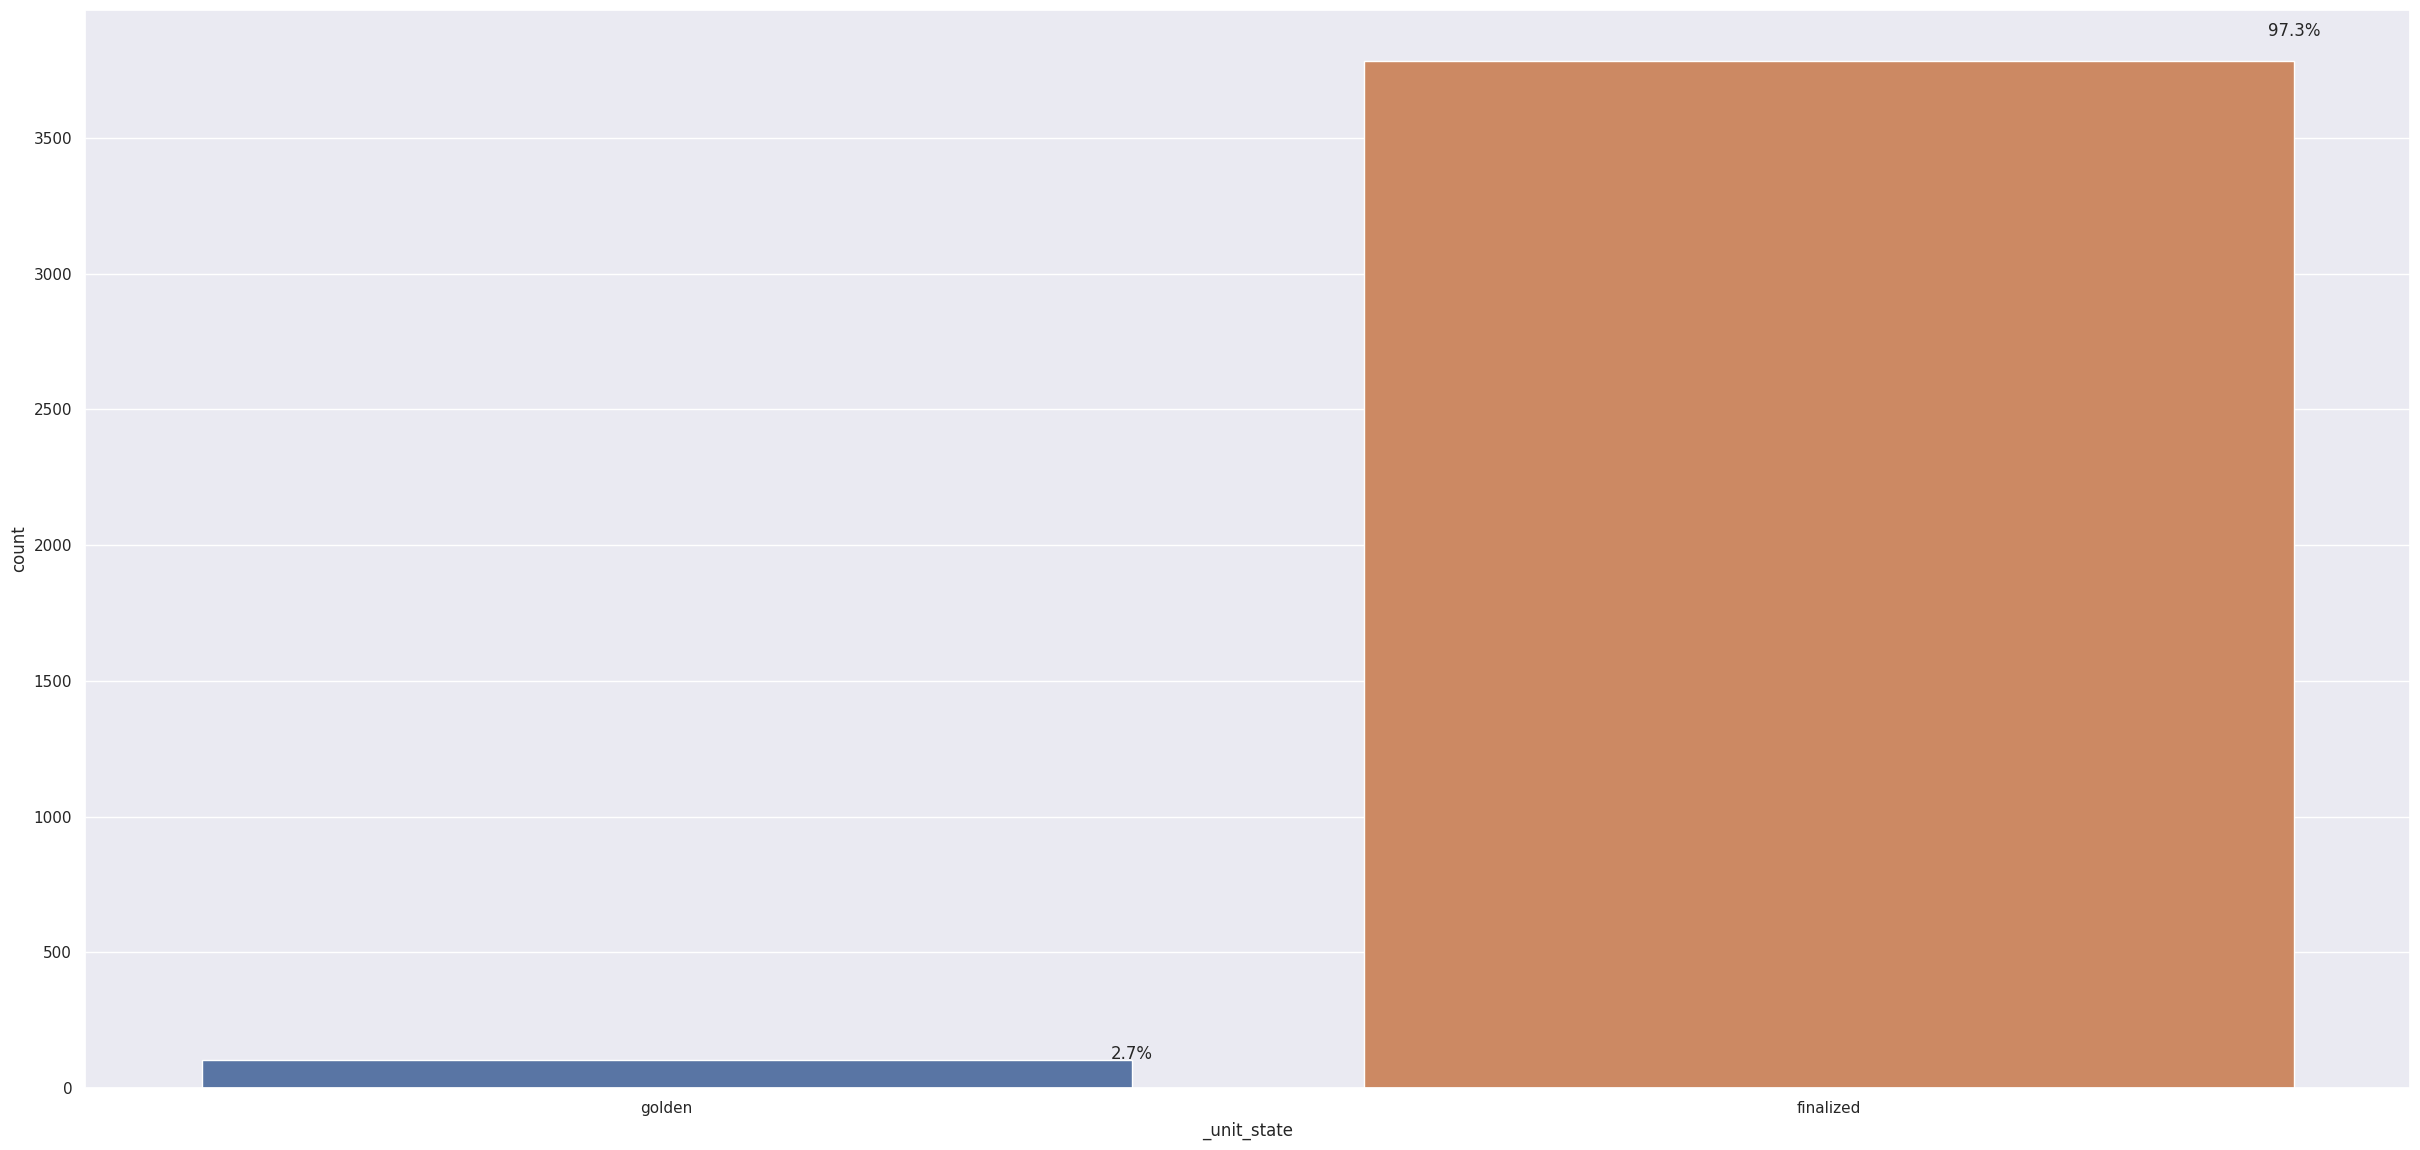

In [ ]:
creates a count plot showing the distribution of data points across different states, and it annotates each bar with the percentage of the total number of data points it represents.
plt.figure(figsize=(30,14))
total = float(len(data))
ax = sns.countplot(x="_unit_state", data=data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()* 1.025
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Feature Extraction


In [ ]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,Positive,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,Positive,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,Positive,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,Positive,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/2014 12:14,Negative,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [ ]:
# For NLP we will keep only the necessary columns such as "verified reviews" and "sentiment" columns and we will drop the rest
data.drop(["_unit_id", "_last_judgment_at", "sentiment:confidence", "date", "id", "query", "sentiment_gold"], axis = 1, inplace = True)

In [ ]:
data.head()

,_golden,_unit_state,_trusted_judgments,sentiment,text
0,True,golden,10,Positive,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,True,golden,12,Positive,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,True,golden,10,Positive,My cat only chews @apple cords. Such an #Apple...
3,True,golden,17,Positive,I agree with @jimcramer that the #IndividualIn...
4,False,finalized,3,Negative,Nobody expects the Spanish Inquisition #AAPL


In [ ]:
# create lemmatizer
# creating an instance of the WordNetLemmatizer class from the Natural Language Toolkit (NLTK) library. The WordNetLemmatizer is used for lemmatization, which is the process of reducing words to their base or root form.
lemmatizer = WordNetLemmatizer()

In [ ]:
# function to get the simpler virsion of pos tag  to use  in lemmitazation
# This code defines a function called get_simple_pos that takes a part-of-speech (POS) tag as input and returns a simplified POS tag based on common categories. The function uses the WordNet POS tags and simplifies them into broader categories, primarily focusing on nouns (N), verbs (V), adjectives (J), and adverbs (R).
def get_simple_pos(tag):
    if tag.startswith('N') or tag.startswith('J'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
#that takes a text review as input and performs several text cleaning operations. The goal is to preprocess the text data and make it suitable for natural language processing tasks.
def clean_reviews(review):
    clean_words=[]
    # Remove email addresses patterns
    raw_review = re.sub('\b[\w\-.]+?@\w+?\w+?\.\w{2,4}\b'," ", review)
    # Remove URLs  patterns
    raw_review =re.sub("[^a-zA-Z]"," ", raw_review)
    #Remove numbers
    raw_review= re.sub("\d+(\.\d+)?"," ", raw_review)

    stop_words=set(stopwords.words("english"))
    words_tokens= nltk.word_tokenize(raw_review)
    for word in words_tokens :

      if word.lower() not in stop_words:
        pos = pos_tag([word]) # get the part of speech of each word

        clean_word=(lemmatizer.lemmatize(word.lower(), pos=get_simple_pos(tag)) for word, tag in pos)
        clean_words.append("".join(clean_word))

    return (" ".join(clean_words))

In [ ]:
# store the cleaned reviews inside clean_reviews_corpus array
#This code is iterating through the "text" column of a DataFrame (data) containing reviews, applying the clean_reviews function to each review, and then storing the cleaned reviews in a new list called clean_reviews_corpus.
clean_reviews_corpus = []

for index, review in enumerate(data["text"]):
  clean_reviews_corpus.append(clean_reviews(data["text"][index]))

In [ ]:
#This code is applying the clean_reviews function to the "text" column of a DataFrame (data) and replacing the original "text" column with the cleaned and preprocessed versions.
data["text"] = data["text"].apply(clean_reviews)
data["text"].head()

0       aapl best steve job email ever http co g kl tx
1    rt jpdesloges aapl stock mini flash crash toda...
2                        cat chew apple cord applesnob
3    agree jimcramer individualinvestor trade apple...
4               nobody expect spanish inquisition aapl
Name: text, dtype: object

In [ ]:
data.head()

,_golden,_unit_state,_trusted_judgments,sentiment,text
0,True,golden,10,Positive,aapl best steve job email ever http co g kl tx
1,True,golden,12,Positive,rt jpdesloges aapl stock mini flash crash toda...
2,True,golden,10,Positive,cat chew apple cord applesnob
3,True,golden,17,Positive,agree jimcramer individualinvestor trade apple...
4,False,finalized,3,Negative,nobody expect spanish inquisition aapl


In [ ]:
#This code prints the cleaned and preprocessed version of the review at index 5 in the "text" column of the DataFrame data. The review has undergone text cleaning and preprocessing using the clean_reviews function.
print("review 5 cleaned {",data["text"][5],"}")

review 5 cleaned { aapl rocket stock buy december gain apple http co eg xhxdlls }


In [ ]:
#This code is performing some analysis on the frequency of words in the cleaned and preprocessed text data
words_values = pd.Series(" ".join(data["text"]).split()).value_counts()
print(words_values)
rare_words = words_values[words_values <= 3]
print(rare_words)
print(rare_words.value_counts())

apple        3965
co           2326
http         2314
aapl         1385
rt            848
             ... 
tokyo           1
nqes            1
ldmfg           1
qx              1
unhelpful       1
Length: 7938, dtype: int64
dropbox       3
arccosgolf    3
slice         3
buddy         3
thru          3
             ..
tokyo         1
nqes          1
ldmfg         1
qx            1
unhelpful     1
Length: 6466, dtype: int64
1    4966
2    1056
3     444
dtype: int64


In [ ]:
#This code is modifying the "text" column in the DataFrame data by removing words that are considered rare. The rarity threshold is determined by the rare_words variable, which contains words that occur three times or fewer in the dataset
data["text"] = data["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
data["text"].head()

0             aapl best steve job email ever http co g
1    rt jpdesloges aapl stock mini flash crash toda...
2                                       cat apple cord
3      agree jimcramer trade apple aapl today good see
4                                          expect aapl
Name: text, dtype: object

In [ ]:
# Create function to display wordcload
#This code defines a function called create_WordCloud that generates and displays a word cloud visualization based on the provided text data
def create_WordCloud(data, back_ground_color = "black", title = None):
  wordcloud = WordCloud(background_color=back_ground_color, max_words=300, max_font_size=30 , scale=3,random_state=1).generate(str(data))
  mpl.rcParams['figure.figsize']=(15,15)
  mpl.rcParams['font.size']=20
  #plt.style.use('fast')
  fig = plt.figure(1)
  if title:
    plt.title(title, fontsize= 30)

  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

In [ ]:
# seprate the pos and neg words
#Negative_words = " ".join(data[data["verified_reviews"]  =="0"]in categories).split()
#This code is creating two lists, Positive_words and Negative_words, by categorizing the reviews based on a binary label provided in the categories list. The categories list is assumed to contain binary labels (1 or 0), where 1 indicates a positive sentiment and 0 indicates a negative sentiment.
Negative_words =[]
Positive_words=[]


#clean_reviews(data["verified_reviews"][index]
for index,num  in enumerate (categories):
    if num == 1:
        Positive_words.append(data["text"][index])
    else :
        Negative_words.append(data["text"][index])

In [ ]:
#slicing the list Negative_words to retrieve the first 20 elements (or reviews) from the list.
Negative_words[:20]

['expect aapl',
 'aapl show make world biggest tech company http co',
 'rt bought apple store pretty good logo match wait install http co z',
 'apple day show sign http co p',
 'apple thanks store appointment run almost minute late',
 'aapl stock mini flash crash today money morning nothing analyst suggest would make http co',
 'aapl dip world aapl',
 'need ip portfolio defend big company look samsung apple court battle',
 'rt thehill justice department cite th century federal law get apple unlock iphones http co eth qpaiom',
 'thehill apple cite th',
 'rt thehill justice department cite th century federal law get apple unlock iphones http co eth qpaiom',
 'rt thehill justice department cite th century federal law get apple unlock iphones http co eth qpaiom',
 'way stay rt thehill justice department cite th century federal law get apple unlock iphones http co',
 'rt thehill justice department cite th century federal law get apple unlock iphones http co eth qpaiom',
 'rt jh staff issue 

In [ ]:
Positive_words[:20]

['aapl best steve job email ever http co g',
 'rt jpdesloges aapl stock mini flash crash today aapl aapl http co e',
 'cat apple cord',
 'agree jimcramer trade apple aapl today good see',
 'aapl stock buy december gain apple http co',
 'top apple tablet damn right http co',
 'cnbctv apple margin well expect aapl http co',
 'apple inc flash crash need know http co aapl',
 'wtf battery one second ago wtf apple',
 'apple watch top search engine list best wearable tech http co aapl iwatch applewatch',
 'best design iphone apps world accord apple http co http co',
 'apple contact sync yosemite io seriously screw use much past icloud',
 'aapl applenws thanks non dumb twitter stock drop point one minute thanks rumor',
 'buy iphone apple iphone use verizon network',
 'jh staff issue apple macbook ipad mini txed http co',
 'apple love center damn calendar app fix back center http co',
 'get storage almost full notification literally every minute apple',
 'make switch iphone galaxy note apple ke

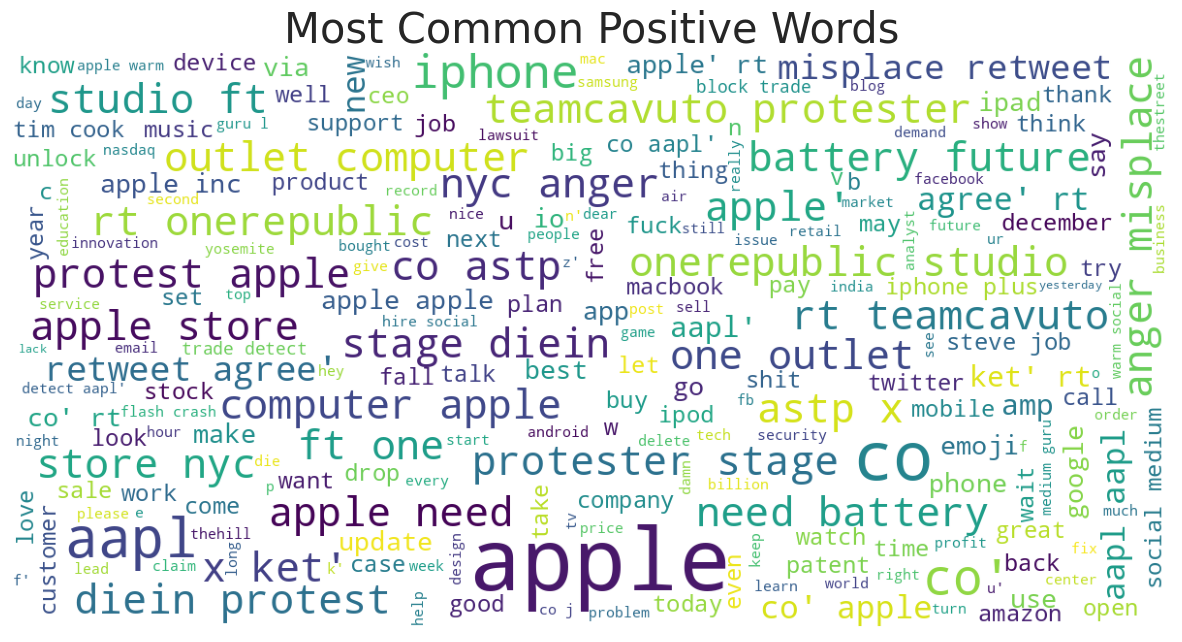

In [ ]:
# wordcload for positive words
#This code is calling the create_WordCloud function to generate and display a word cloud visualization based on the positive reviews stored in the Positive_words list.
create_WordCloud(Positive_words, back_ground_color = "white", title = "Most Common Positive Words")

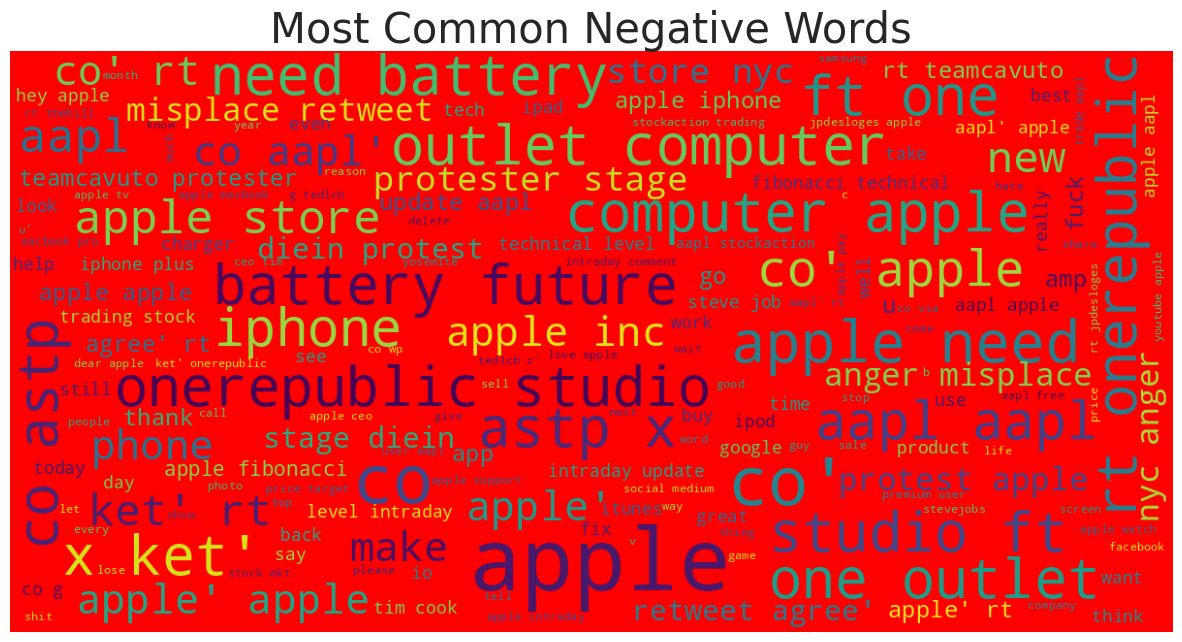

In [ ]:
# wordcload for negative words
create_WordCloud(Negative_words, back_ground_color="red",title="Most Common Negative Words")

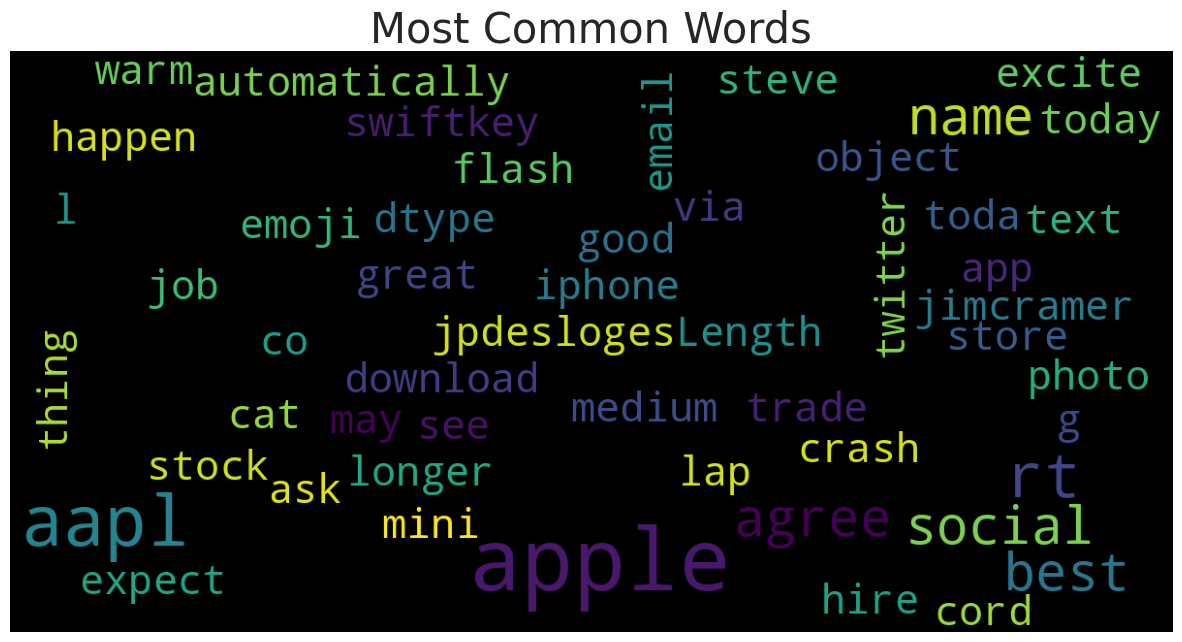

In [ ]:
# wordcload for all words
create_WordCloud(data["text"], title = "Most Common Words")

In [ ]:
# Top 15 words are in positive reviews
#This code is using the Natural Language Toolkit (NLTK) to compute the frequency distribution of words in the positive reviews (Positive_words) and then extracting the 15 most common words.
freq_pos = nltk.FreqDist(Positive_words)
freq_pos.most_common(15)

[('rt onerepublic studio ft one outlet computer apple need battery future http co astp x ket',
  61),
 ('rt teamcavuto protester stage diein protest apple store nyc anger misplace retweet agree',
  57),
 ('block trade detect aapl', 7),
 ('important apple become developer world need people invent stuff tim cook ceo apple',
  3),
 ('apple', 3),
 ('rt cruci btch harry potter emojis please work apple', 3),
 ('happy monday camera fancy apple iphone plus suddenly stop work weekend instead meme http co',
  3),
 ('fuck apple', 2),
 ('apple intraday comment update range premium user aapl stockaction trading stock mkt http co g tedlcb z',
  2),
 ('trade aapl free nightly update post twitter visit trade aapl free website http co u tkeapbxf',
  2),
 ('rt sunrise wow sunrise morning iphone apple apple sun http co', 2),
 ('rt thestreet apple survive holiday investor say yes http co n k', 2),
 ('apple iphone lead time still longer previous model aapl aapl http co', 2),
 ('rt china russia may ban appl

In [ ]:
# Top 15 words are in negative reviews
freq_neg=nltk.FreqDist(Negative_words)
freq_neg.most_common(10)

[('rt onerepublic studio ft one outlet computer apple need battery future http co astp x ket',
  243),
 ('rt teamcavuto protester stage diein protest apple store nyc anger misplace retweet agree',
  93),
 ('apple fibonacci technical level intraday update aapl aapl http co', 21),
 ('rt shannonmmiller love apple support hourofcode workshop http co wp fnjnu',
  18),
 ('rt thehill justice department cite th century federal law get apple unlock iphones http co eth qpaiom',
  17),
 ('apple intraday comment update range premium user aapl stockaction trading stock mkt http co g tedlcb z',
  13),
 ('apple ceo tim cook come gay apple http co eufqqpmjj via posh net', 11),
 ('apple', 11),
 ('trade aapl free nightly update post twitter visit trade aapl free website http co u tkeapbxf',
  10),
 ('block trade detect aapl', 9)]

Test, Train Split & Vectorization

In [ ]:
# train-test-split
#split the dataset into training and testing sets for a machine learning model.
x_train, x_test, y_train, y_test = train_test_split(data["text"], categories, stratify = categories, test_size = 0.20, random_state = 42)

In [ ]:
# Vectorization
# here we create new CountVectorizer, which will help us understand and count the words.
# and it has different ways to use it, but we will only use it with  2-3 gram
#consider both single words and pairs of consecutive words when converting text data into a numerical representation
count_vec = CountVectorizer(ngram_range = (1,2))

In [ ]:
# vectorizer to read the train text for us
#This code is using the CountVectorizer (count_vec) instance to transform the training text data (x_train) into a matrix of token counts (word occurrences).
x_train_features = count_vec.fit_transform(x_train)
x_train_features = x_train_features.toarray() # to get the frequincy of the words

In [ ]:
#This code is using the previously fitted CountVectorizer instance (count_vec) to transform the test text data (x_test) into a document-term matrix. It ensures that the same set of features (words or n-grams) obtained from the training data is used for the test data
x_test_features = count_vec.transform(x_test)

In [ ]:
# https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d#:~:text=Term%20Frequency%20%E2%80%94%20Inverse%20Document%20Frequency%20(TFIDF)%20is%20a%20technique,in%20a%20document%20into%20consideration.


In [ ]:
# TF-IDF Vectorization
#This code is using the TfidfVectorizer class from scikit-learn to convert the training and test text data (x_train and x_test) into TF-IDF (Term Frequency-Inverse Document Frequency) representations
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_Tfid = tfidf_vectorizer.fit_transform(x_train)
X_test_Tfid = tfidf_vectorizer.transform(x_test)

In [ ]:
#The code X_train_Tfid.toarray() is converting the sparse matrix X_train_Tfid (representing TF-IDF values) into a dense NumPy array. The toarray() method is commonly used to convert sparse matrices into dense representations, allowing you to access and manipulate the actual values stored in the matrix
X_train_Tfid.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07934145, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Deep Learning -- Neural Network

In [ ]:
# find the length of the largest sentence in training data
#This code is finding the maximum number of words in a text within the training data (x_train).
max_len = max(x_train, key = len)
print(f'Max number of words in a text in training data: {len(max_len)}')

Max number of words in a text in training data: 118


In [ ]:
# Convert reviews to padded sequences
#This code is creating an instance of the Tokenizer class from Keras with a specified maximum number of words (max_words). The Tokenizer class is often used for text tokenization in natural language processing tasks.
max_words = 118
tokenizer = Tokenizer(num_words = max_words)

In [ ]:
# create the vocabulary by fitting on X_train text
#The code tokenizer.fit_on_texts(x_train) is fitting the Tokenizer instance (tokenizer) on the training text data (x_train). This step is part of the tokenization process and involves updating the internal vocabulary based on the words present in the training data
tokenizer.fit_on_texts(x_train)

In [ ]:
# get the sequence of tokens
#converting the text data in the training (x_train) and testing (x_test) sets into sequences of integers using the vocabulary learned by the Tokenizer instance
xtrain_seq = tokenizer.texts_to_sequences(x_train)
xtest_seq = tokenizer.texts_to_sequences(x_test)

In [ ]:
# padding the sequences
#This code is performing sequence padding on the integer sequences generated from the text data and stored in xtrain_seq and xtest_seq. It is also obtaining the word index from the Tokenizer instance.
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=len(max_len))
xtest_pad = sequence.pad_sequences(xtest_seq, maxlen=len(max_len))
word_index = tokenizer.word_index

In [ ]:
#This code is printing the original text review, the integer sequence representation before padding, and the sequence after padding for a specific training example.
# get a random example
print('train review num 10:', x_train[1])
print('before padding:', xtrain_seq[1])
print('after padding:', xtrain_pad[1])

train review num 10: rt jpdesloges aapl stock mini flash crash today aapl aapl http co e
before padding: [1, 8]
after padding: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 8]


In [ ]:
# data shape after padding
#The provided code is printing the shapes of the arrays or data structures xtrain_pad, xtest_pad, y_train, and y_test.
print(xtrain_pad.shape)
print(xtest_pad.shape)
print(y_train.shape)
print(y_test.shape)

(3108, 118)
(778, 118)
(3108, 1)
(778, 1)


Creating the network

In [ ]:
#This code defines a function create_model() that returns a neural network model for a binary classification task.
def create_model():
    model = tf.keras.models.Sequential([tf.keras.layers.Embedding(max_words, 100, input_length=max_words),
                                        tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, padding ='same', activation='relu'),
                                        tf.keras.layers.MaxPooling1D(pool_size = 2),
                                        tf.keras.layers.LSTM(256),
                                        tf.keras.layers.Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(3e-4), metrics=['accuracy'])
    return model

In [ ]:
#This code creates an instance of a neural network model using the create_model() function and then prints a summary of the model's architecture.
model = create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 118, 100)          11800     
                                                                 
 conv1d_5 (Conv1D)           (None, 118, 32)           6432      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 59, 32)            0         
 g1D)                                                            
                                                                 
 lstm_5 (LSTM)               (None, 256)               295936    
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 314425 (1.20 MB)
Trainable params: 314425 (1.20 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

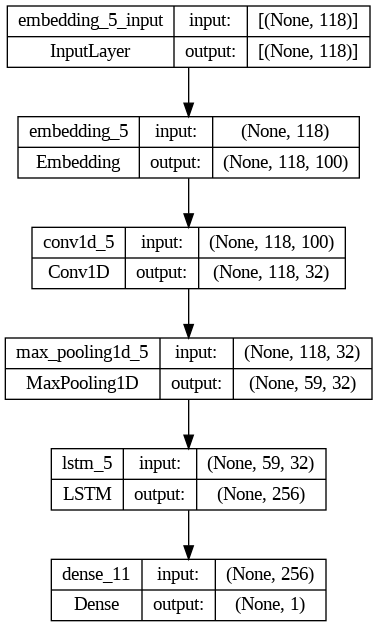

In [ ]:
# print the block diagram of our model
#This code is using the plot_model function from Keras to create and display a visual representation (graph) of the neural network model's architecture. The specific settings show_shapes=True and show_layer_names=True indicate that the shapes of the layers and their names should be included in the plot
plot_model(model, show_shapes = True, show_layer_names = True)

Training the Network

In [ ]:
# create model checkpoint and callbacks to save the model weights when validation accuracy is maximum
#This code is creating an instance of the EarlyStopping callback in Keras, which can be used during the training of a neural network to stop the training process early under certain conditions
callback=tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 2, verbose = 2, mode = 'auto', baseline = None, restore_best_weights = True)

In [ ]:
#This code checks if a GPU (Graphics Processing Unit) is available for use with TensorFlow
device = tf.test.gpu_device_name()
if device != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device))

Found GPU at: /device:GPU:0


In [ ]:
# fit the model
#This code is using TensorFlow's tf.device context manager to specify that the following operations, in this case, the training of the model, should be executed on the GPU if available.
with tf.device('/device:GPU:0'):
    history = model.fit(xtrain_pad, y_train, validation_data = (xtest_pad, y_test), class_weight = {0:87, 1:13}, epochs = 10, batch_size = 32)

Epoch 1/10
98/98 [==============================] - 11s 54ms/step - loss: 16.7150 - accuracy: 0.7825 - val_loss: 0.7980 - val_accuracy: 0.7879
Epoch 2/10
98/98 [==============================] - 3s 28ms/step - loss: 11.7015 - accuracy: 0.7883 - val_loss: 0.6901 - val_accuracy: 0.7879
Epoch 3/10
98/98 [==============================] - 2s 19ms/step - loss: 11.6809 - accuracy: 0.7883 - val_loss: 0.7382 - val_accuracy: 0.7879
Epoch 4/10
98/98 [==============================] - 1s 15ms/step - loss: 11.6641 - accuracy: 0.7883 - val_loss: 0.7485 - val_accuracy: 0.7879
Epoch 5/10
98/98 [==============================] - 1s 13ms/step - loss: 11.6097 - accuracy: 0.7883 - val_loss: 0.6743 - val_accuracy: 0.7879
Epoch 6/10
98/98 [==============================] - 1s 10ms/step - loss: 11.6204 - accuracy: 0.7883 - val_loss: 0.6731 - val_accuracy: 0.7879
Epoch 7/10
98/98 [==============================] - 1s 10ms/step - loss: 11.5764 - accuracy: 0.7883 - val_loss: 0.6992 - val_accuracy: 0.7879
Epoch

In [ ]:
# predict probabilities for test set
#This code is using the trained neural network model (model) to make predictions on the test data (xtest_pad)
y_probs = model.predict(xtest_pad, verbose = 0)

In [ ]:
# predict classes for test set
#This code is converting the predicted probabilities from the neural network model into binary class labels based on a threshold
y_classes = (model.predict(xtest_pad) > 0.5).astype("int32")
y_train_pred=(model.predict(xtrain_pad) >= 0.5).astype("int32")

98/98 [==============================] - 1s 7ms/step


In [ ]:
# Model evaluation
#This code is evaluating the performance of the neural network model on both the training and test datasets and then printing the accuracy.
train_nn_results = model.evaluate(xtrain_pad, y_train, verbose=0)
test_nn_results = model.evaluate(xtest_pad, y_test, verbose=0)
print(f'Train accuracy: {train_nn_results[1]*100:0.2f}')
print(f'Test accuracy: {test_nn_results[1]*100:0.2f}')

Train accuracy: 78.83
Test accuracy: 78.79


In [ ]:
#saving the entire Keras model, including its architecture, weights, and optimizer state, into a single HDF5 file named 'my_model.h5'. This is a common way to save a trained model so that it can be loaded later for further use or deployment.
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#This code defines six text reviews (review_1 to review_6) related to Apple, presumably for some sentiment analysis or natural language processing task. The reviews cover a range of sentiments, from negative to potentially neutral or positive.
review_1 = '@apple your chargers suck ass! They just love to break!'
review_2 = "Then how the hell did I take this screenshot? @apple @timcook http://t.co/NvFWwi4JsM "
review_3 = "i get the storage almost full notification literally every 5 minutes chill @apple"
review_4 = "So so sooooo annoyed. Did the restore from my back up and lost my voice mails. I needed to keep those. Thanks a lot @apple"
review_5 = "This one chart explains @tim_cook's affect on @Apple. Paints an interesting story. What do you think? http://t.co/7cBY6jL5Pn"
review_6 = "if i buy a 16 gb phone i should have 16 GB'S TO USE @apple"

reviews = [review_1, review_2, review_3, review_4, review_5, review_6]


In [ ]:
#This code defines a function named get_predictions that takes a text input, loads a pre-trained Keras model (my_model.h5), preprocesses the text, and returns the predicted sentiment label for the input text.
results = {}
preds = []
def get_predictions(text):
    sequence = tokenizer.texts_to_sequences([text])
    # pad the sequences
    model_= load_model("my_model.h5")
    sequence = pad_sequences(sequence, maxlen = max_words)
    # get the prediction
    prediction = model_.predict(sequence)[0]
    if (np.round(prediction, 2) >= 0.5):
        pred = "Positive"
    else:
        pred = "Negative"
    return pred

In [ ]:
#This code uses the get_predictions function to obtain sentiment predictions for each review in the reviews list. The predictions are then added to a list (preds) and stored in a dictionary (results) under the key "CNN_LSTM_Model"
for ind, review in enumerate(reviews):
    prediction = get_predictions(review)
    preds+=[prediction]
    results["CNN_LSTM_Model"] = preds

1/1 [==============================] - 0s 368ms/step


In [ ]:
# df_reviews = pd.DataFrame(reviews, index=["Review 1", "Review 2"])
#This code creates a Pandas DataFrame (df_reviews) from a list of reviews and then displays the DataFrame as an HTML table
df_reviews = pd.DataFrame(reviews, index=["Review 1", "Review 2", "Review 3", "Review 4", "Review 5", "review 6"])

display(HTML(df_reviews.to_html()))

# df = pd.DataFrame.from_dict(results, orient ='index', columns = ["Review 1", "Review 2"])
#This code creates a Pandas DataFrame (df) from a dictionary (results) and then applies custom styles to enhance the visual representation of the DataFrame
df = pd.DataFrame.from_dict(results, orient ='index', columns = ["Review 1", "Review 2", "Review 3", "Review 4", "Review 5", "review 6"])

df.style.set_table_styles([{"selector": ".row2,.row3,.row6", "props": [("border", "2px solid black"), ("color", "black"), ("background-color", "lightgreen")]},
                           {"selector": "thead", "props":"background-color:aqua; color:black; border:3px solid black;"}])

,0
Review 1,@apple your chargers suck ass! They just love to break!
Review 2,Then how the hell did I take this screenshot? @apple @timcook http://t.co/NvFWwi4JsM
Review 3,i get the storage almost full notification literally every 5 minutes chill @apple
Review 4,So so sooooo annoyed. Did the restore from my back up and lost my voice mails. I needed to keep those. Thanks a lot @apple
Review 5,This one chart explains @tim_cook's affect on @Apple. Paints an interesting story. What do you think? http://t.co/7cBY6jL5Pn
review 6,if i buy a 16 gb phone i should have 16 GB'S TO USE @apple


,Review 1,Review 2,Review 3,Review 4,Review 5,review 6
CNN_LSTM_Model,Negative,Negative,Negative,Negative,Negative,Negative
